# Now You Code 2: Arrests by State

You are now finished with college and doing some research on where to apply for a job. Workng in a safe state would be a great start.

Scrape the FBI arrest by state table provided on ucr.fbi.gov. The table is available at the link below.

https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-69

Suggested Approach:
- Download the html using the requests library.
- Extract the data using BeautifulSoup from the table using. Make sure you use functions that extract each part of the data.
- Build a pandas dataframe containing the data. To make things a little easier, use Total all ages for each state.
- Create a bar chart displaying the state and total arrests.


In [73]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook
plt.rcParams["figure.figsize"] = [12, 6]

<IPython.core.display.Javascript object>


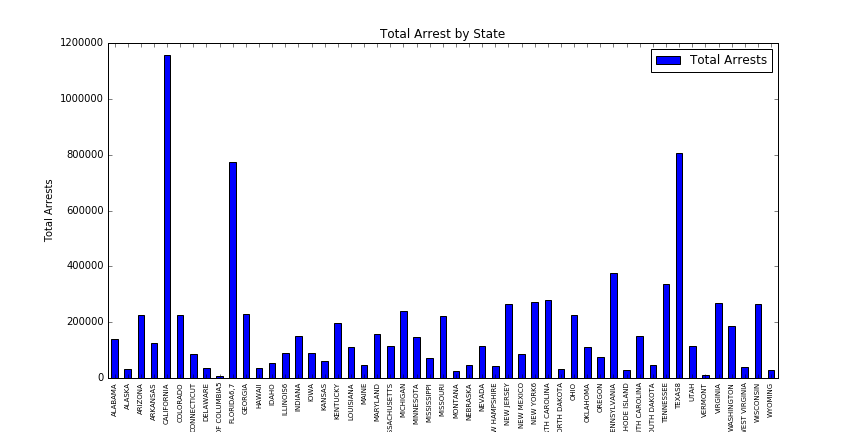

In [98]:
DATA_URL = 'https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-69'

def get_html(url):
    response = requests.get(url)
    return response.text

def get_headers(table):
    """
    Get headers from BeautfulSoup table object
    """
    headers = table.find('thead').find_all('th')
    hl = []
    for th in headers:
        v = th.get_text().strip()
        if v != '':
            hl.append(v)
    return hl

def get_row_data(table):
    rows = table.find('tbody').find_all('tr')
    i = 1
    data = []
    while i < len(rows):
        state = rows[i-1].find('th').get_text().strip()
        values = []
        for r in rows[i].find_all('td'):
            v = r.get_text().strip().replace(',', '')
            try:
                v = int(v)
            except ValueError:
                v = ''
            values.append(v)
        values.insert(0, state)
        data.append(values)
        i += 2
    return data
        
    

html = get_html(DATA_URL)
table = BeautifulSoup(html, 'lxml').select('#table-data-container > table')[0]
header_list = get_headers(table)
header_list[1] = "Total Arrests"
values = get_row_data(table)
df = pd.DataFrame(values)
df.columns = header_list
df.plot(kind='bar', x='State', y=0, title="Total Arrest by State")
plt.rc('xtick', labelsize=7)
plt.xlabel('State')
plt.ylabel('Total Arrests')
plt.show()